## **DevClub Summer of Code 2023**
**Machine Learning: Week 1**

Week 1 Assignment : Price Prediction (Solution)

Importing the dataset(taken from Kaggle) into colab

In [122]:
import pandas as pd
import matplotlib as plt
var = pd.read_excel("data.xlsx")

Making the data as list in terms of x and y

In [ ]:
x=list(var['Size '])
y=list(var['Price'])

Plotting the data set as scatter plot

Text(0.5, 0, 'Size in acres')

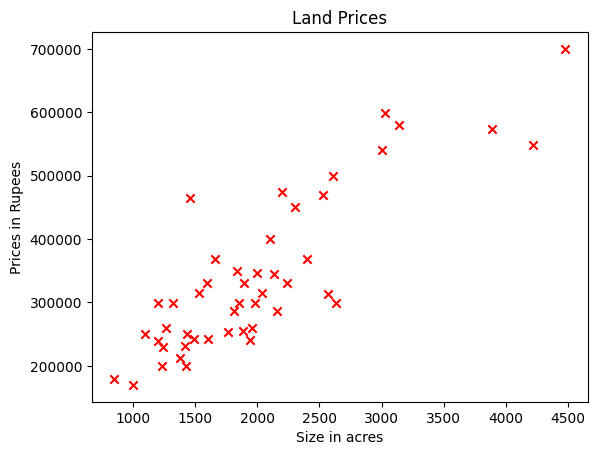

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y,marker='x',c='r')
plt.title("Land Prices")
plt.ylabel("Prices in Rupees")
plt.xlabel("Size in acres")

Calculating Maximum,Minimum and Mean of the dataset of prices

In [ ]:
max_price=max(y)
min_price=min(y)
print("Maximum Price of land is ",max_price)
print("Minimum price of land is ",min_price)

Maximum Price of land is  699900
Minimum price of land is  169900


In [ ]:
import numpy as np
mean_prices = np.mean(y)
print("Mean of Prices is ",mean_prices)

Mean of Prices is  340412.6595744681


Division of data set intro training and testing data

In [123]:
var1 = pd.read_excel("data_testing.xlsx")

In [124]:
var2 = pd.read_excel("data_training.xlsx")

In [125]:
x_train = np.array([2.104,1.600,2.400,1.416,3.0,1.985]) #sizes in thousands multiples
y_train = np.array([399.9,329.9,369,232,539.9,299.9]) #prices in thousands multiples

Using linear regression as the model for the price prediction there by calculating the Cost Function and Gradient Descent and using an external code lab_utils_uni for the plotting of cost function and gradient descent for more visualisation.

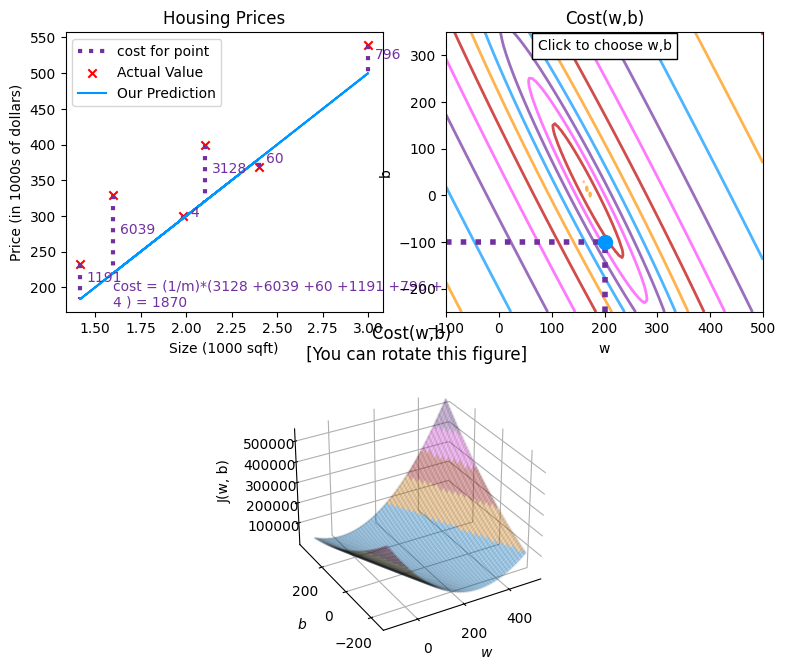

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
def compute_cost(x, y, w, b):
  m = x.shape[0]
  cost_sum = 0
  for i in range(m):
      f_wb = w * x[i] + b
      cost = (f_wb - y[i]) ** 2
      cost_sum = cost_sum + cost
  total_cost = (1 / (2 * m)) * cost_sum
  return total_cost
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

The cost function J plot with respect to w,b parameters

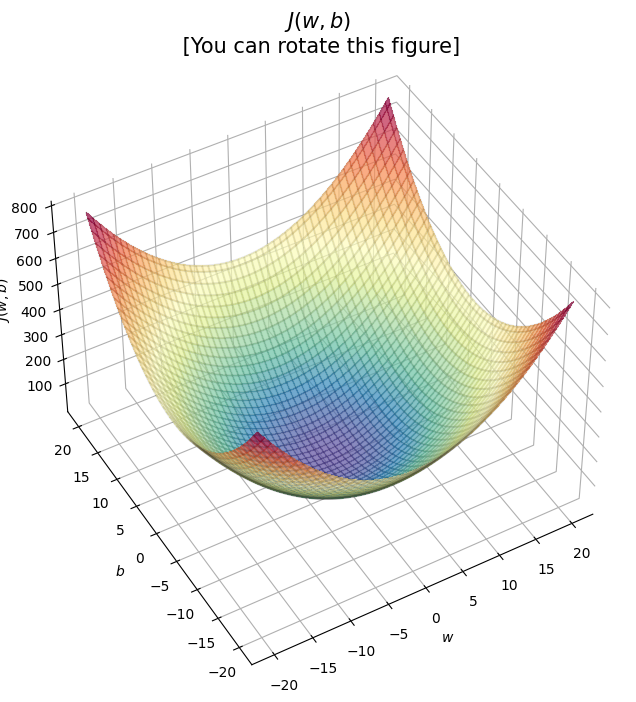

In [127]:
soup_bowl()

In [128]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

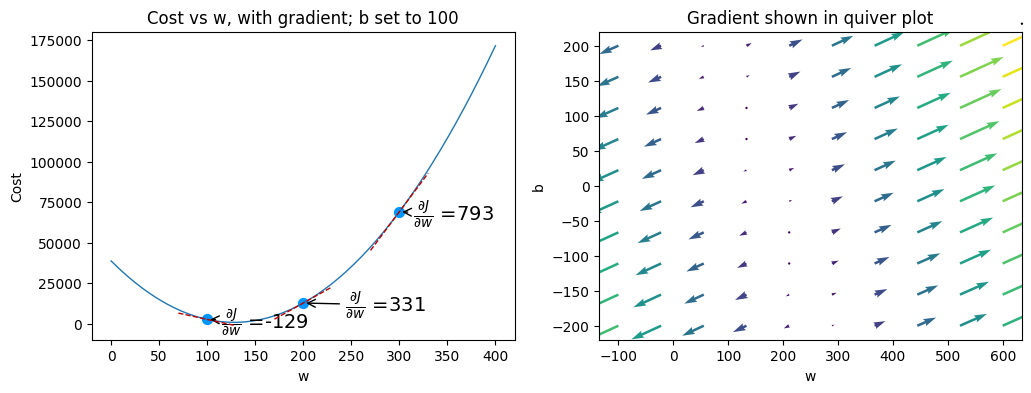

In [129]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Now as we have seen the cost function and gradient descent plots,
Now we move further to finally towards linear regression and calculating the parameters
For that I will directly use the python library sklearn and import linear regression

In [141]:
x_train=list(var2['Size'])
x_train=np.array(x_train)
y_train=list(var2['Price'])
y_train=np.array(y_train)
x_test=list(var1['Size'])
x_test=np.array(x_test)
y_test_actual=list(var1['Price'])
y_test_actual=np.array(y_test_actual)

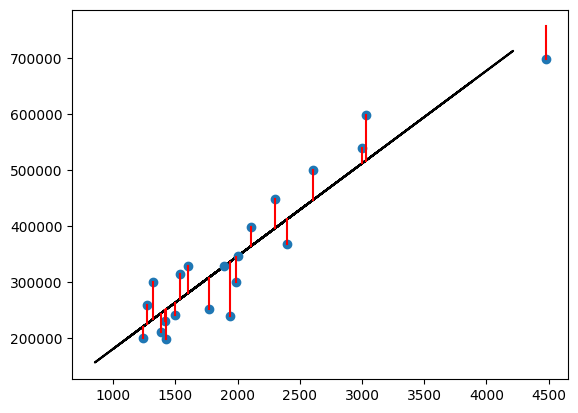

In [113]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x_train[:,np.newaxis],y_train)
y_test=model.predict(x_test[:, np.newaxis])
plt.plot(x_test,y_test, color="black")
plt.plot(x_train,y_train, 'o')
# The following will draw as many line segments as there are columns in matrices x and y
plt.plot(np.vstack([x_train,x_train]), np.vstack([y_train, model.predict(x_train[:, np.newaxis])]), color="red");

In [114]:
print("Parameters:", model.coef_, model.intercept_)
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

Parameters: [165.51083454] 16014.92904387752
Coefficient: 165.51083454037723
Intercept: 16014.92904387752


Finally we have got our parameters for the model that is

Predicted Prices = Size Of land*Model.coef_[0] + model.intercept_

Now we go with the testing of our model with the testing data set and check how accurate it is and calculate the errors



In [154]:
m = x_test.shape[0]
y_test_prediction=np.zeros(m)
absolute=0
square_Error=0
for i in range(m):
  y_test_prediction[i]=model.coef_[0]*x_test[i] + model.intercept_
  c=y_test_prediction[i]-y_test_actual[i]
  absolute=absolute+abs(x)
  square_Error=square_Error+c*c
  print(f"{x_test[i]} sqft land prediction {y_test_prediction[i]:0.1f} Rupees")

1888 sqft land prediction 328499.4 Rupees
1604 sqft land prediction 281494.3 Rupees
1962 sqft land prediction 340747.2 Rupees
3890 sqft land prediction 659852.1 Rupees
1100 sqft land prediction 198076.8 Rupees
1458 sqft land prediction 257329.7 Rupees
2526 sqft land prediction 434095.3 Rupees
2200 sqft land prediction 380138.8 Rupees
2637 sqft land prediction 452467.0 Rupees
1839 sqft land prediction 320389.4 Rupees
1000 sqft land prediction 181525.8 Rupees
2040 sqft land prediction 353657.0 Rupees
3137 sqft land prediction 535222.4 Rupees
1811 sqft land prediction 315755.1 Rupees
1437 sqft land prediction 253854.0 Rupees
1239 sqft land prediction 221082.9 Rupees
2132 sqft land prediction 368884.0 Rupees
4215 sqft land prediction 713643.1 Rupees
2162 sqft land prediction 373849.4 Rupees
1664 sqft land prediction 291425.0 Rupees
2238 sqft land prediction 386428.2 Rupees
2567 sqft land prediction 440881.2 Rupees
1200 sqft land prediction 214627.9 Rupees
852 sqft land prediction 157030.2 

As you can see we have got the predicted prices of our land sizes by our Linear Regression Model, now lets find the erros in the predicted price and the actual price

In [158]:
import math
import sklearn.metrics
mae=absolute/26 ## MAE -Mean Absolute Error
mse=square_Error/26
rmse=math.sqrt(mse)
print("The Mean absolute error is ",mae)
print("The Root mean squared error is ",rmse)
error=mae*100/mean_prices
print("The error percentage is ",error)

The Mean absolute error is  24375.53700404869
The Root mean squared error is  81949.18469231478
The error percentage is  7.160584754550333


The error percentage is approximately 7.16% which is within the boundary limits and hence we can arrive in the conclusion that our ML model is working properly and hence the assignment of Week1 of the very well structured DevClub Summer of Code'23 ends here, hope you guys enjoyed reading my solution.
### **If you liked please star the fork :)**